In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Desktop/Datascience/webmd.csv")

In [3]:
df.head()

,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Age            362806 non-null  object
 1   Condition      362806 non-null  object
 2   Date           362806 non-null  object
 3   Drug           362806 non-null  object
 4   DrugId         362806 non-null  int64 
 5   EaseofUse      362806 non-null  int64 
 6   Effectiveness  362806 non-null  int64 
 7   Reviews        362769 non-null  object
 8   Satisfaction   362806 non-null  int64 
 9   Sex            362806 non-null  object
 10  Sides          362806 non-null  object
 11  UsefulCount    362806 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 33.2+ MB


In [5]:
df=df.drop(['Date','EaseofUse','Effectiveness','Reviews','UsefulCount'],axis=1)

In [6]:
for col in df.columns:
    if df[col].dtype.kind== '0':
        df[col]=df[col].str.strip()

In [7]:
df['Sex'].replace('',np.nan,inplace=True)
df['Age'].replace('',np.nan,inplace=True)
df['Condition'].replace('',np.nan,inplace=True)

df['Sides'].replace('',np.nan,inplace=True)

In [8]:
df.head()

,Age,Condition,Drug,DrugId,Satisfaction,Sex,Sides
0,75 or over,Stuffy Nose,25dph-7.5peh,146724,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro..."
1,25-34,Cold Symptoms,25dph-7.5peh,146724,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro..."
2,65-74,Other,warfarin (bulk) 100 % powder,144731,3,Female,
3,75 or over,Other,warfarin (bulk) 100 % powder,144731,1,Female,
4,35-44,Other,warfarin (bulk) 100 % powder,144731,1,Male,


In [9]:
df.isna().sum()

Age             0
Condition       0
Drug            0
DrugId          0
Satisfaction    0
Sex             0
Sides           0
dtype: int64

In [10]:
print(df["Sex"].value_counts())

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64


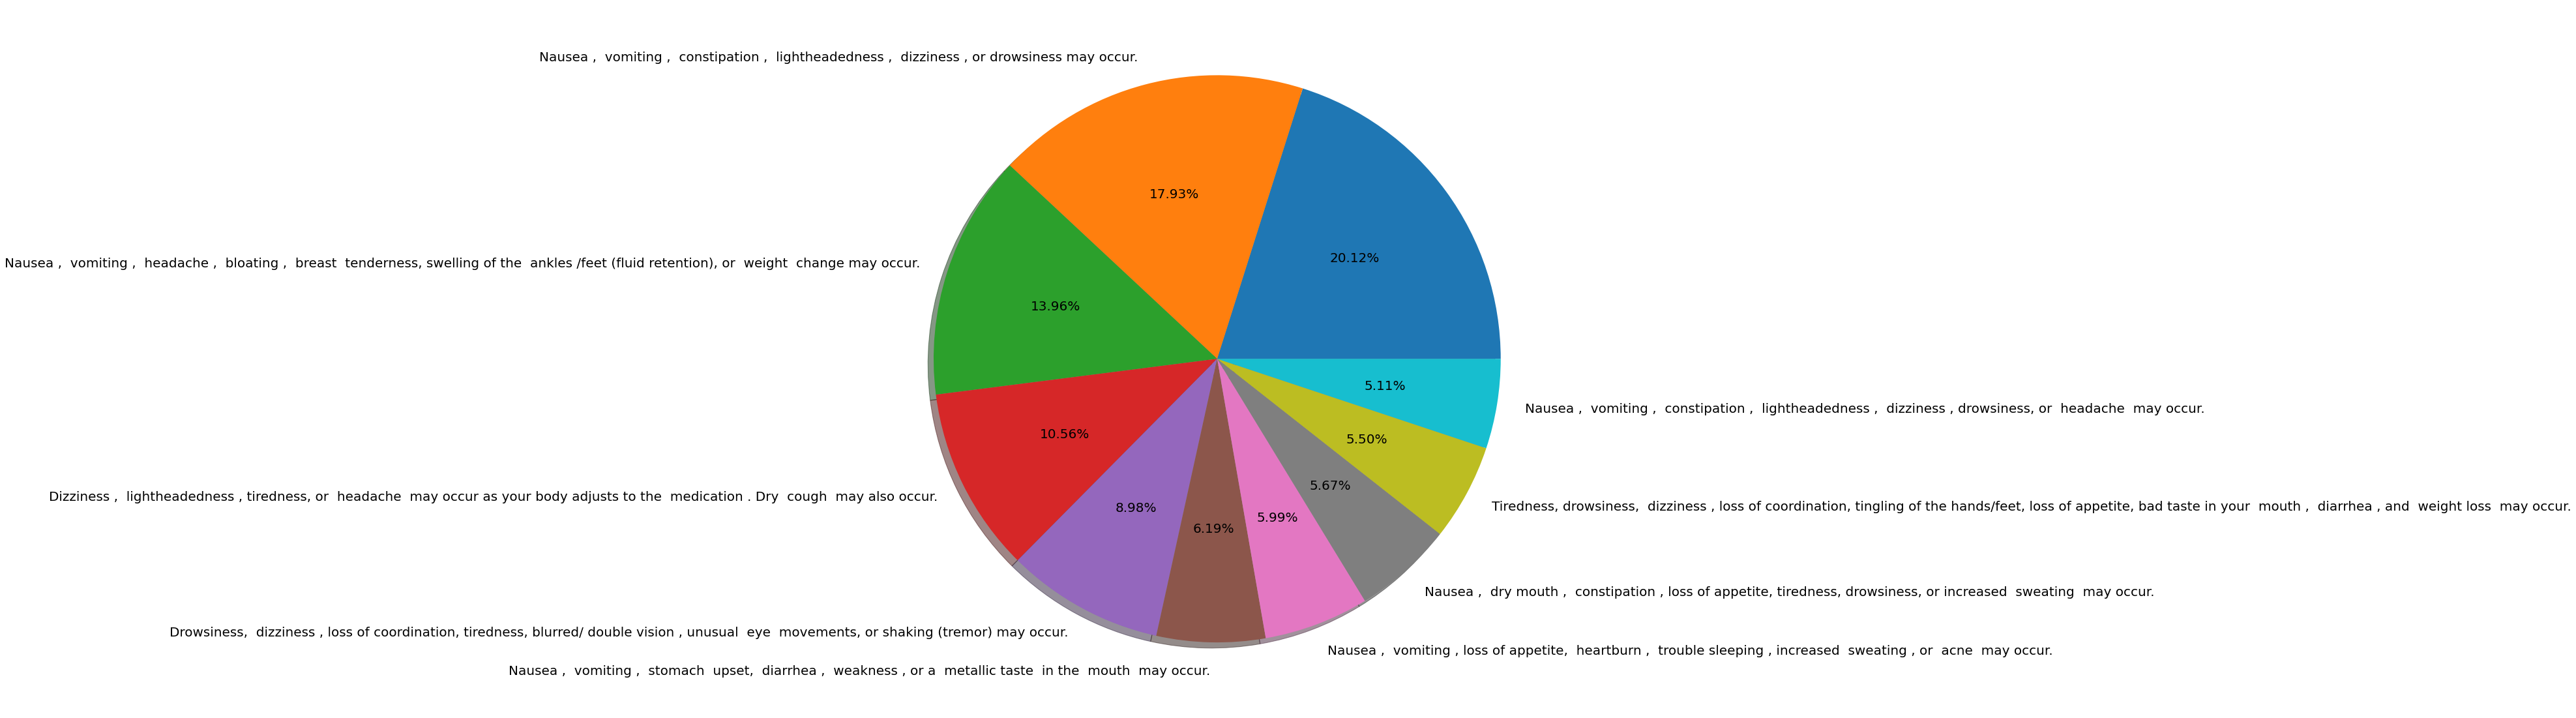

In [11]:
plt.figure(figsize=(20,20))
l=df['Sides'].value_counts().nlargest(10)
plt.pie(l,labels=l.index,shadow=True, textprops={'fontsize': 20},autopct='%1.2f%%')
plt.show()

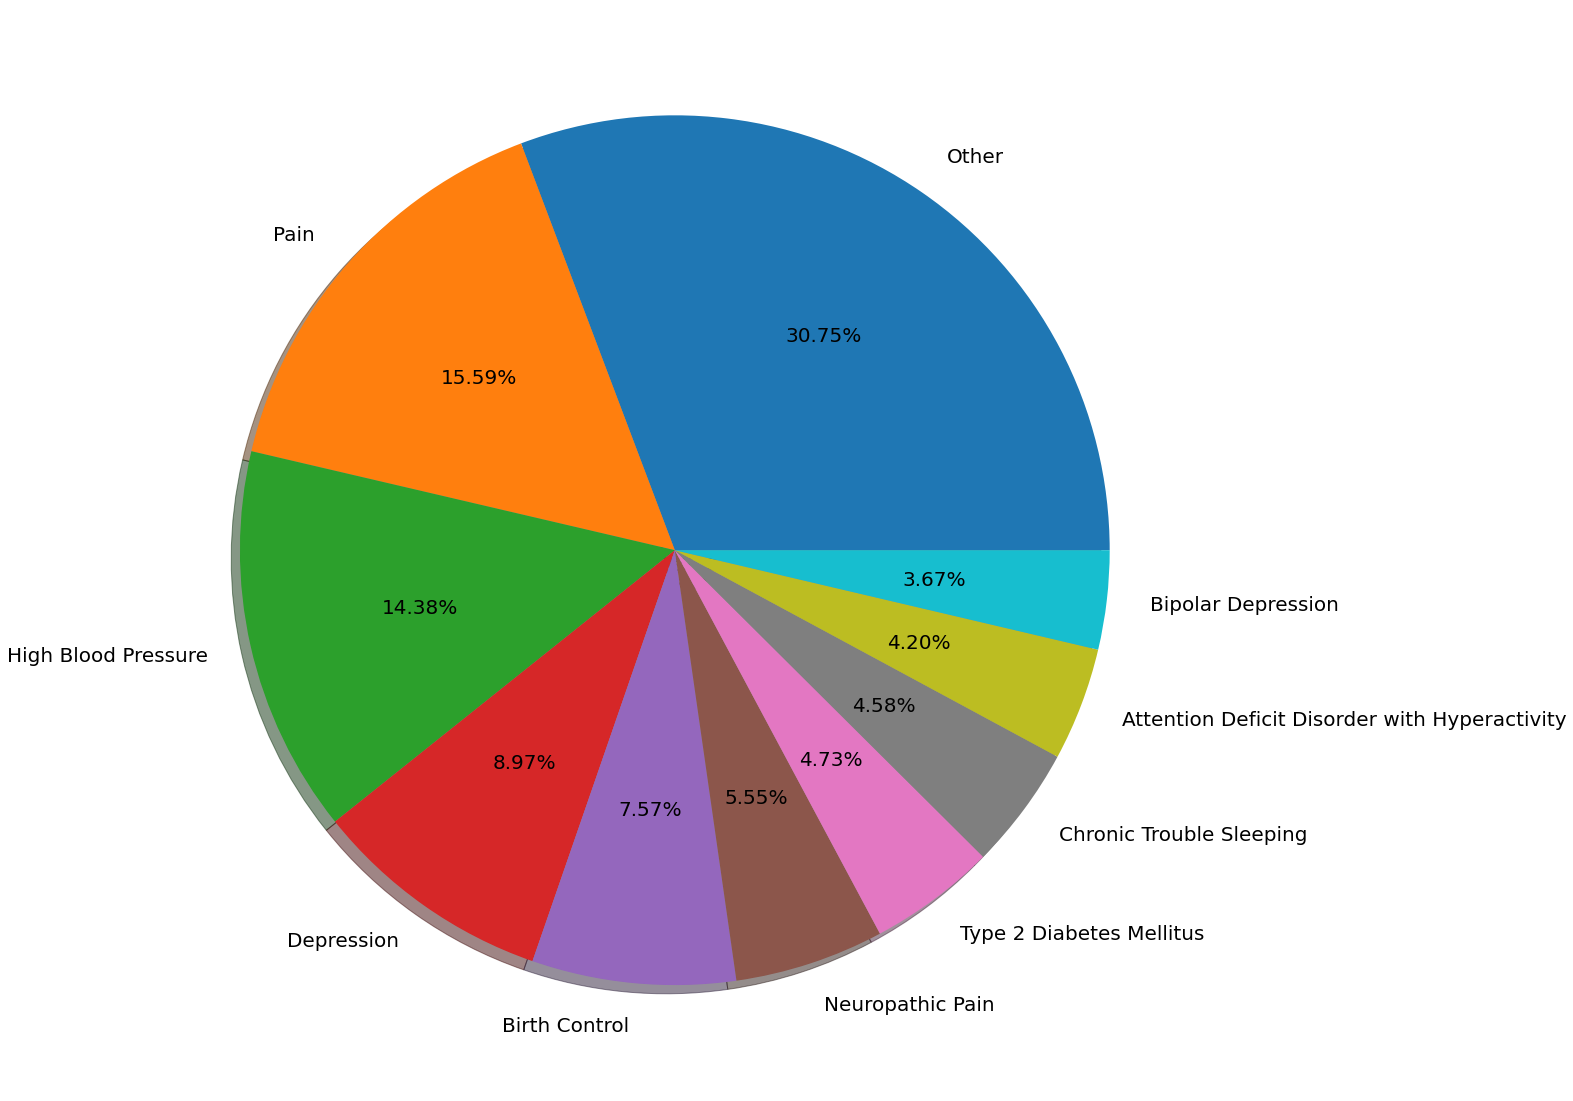

In [12]:
plt.figure(figsize=(20,20))
l=df['Condition'].value_counts().nlargest(10)
plt.pie(l,labels=l.index,shadow=True, textprops={'fontsize': 20},autopct='%1.2f%%')
plt.show()

In [13]:
from sklearn.preprocessing import LabelEncoder
a=['Age']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    

0       75 or over
1            25-34
2            65-74
4            35-44
5            55-64
7            45-54
11           19-24
12                
55           13-18
3254        12-Jul
4682           0-2
4730         6-Mar
Name: Age, dtype: object


In [14]:
from sklearn.preprocessing import LabelEncoder
a=['Age']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    

0       11
1        5
2       10
4        6
5        8
7        7
11       4
12       0
55       3
3254     2
4682     1
4730     9
Name: Age, dtype: int32


In [15]:
from sklearn.preprocessing import LabelEncoder
a=['Condition']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    

0                                        Stuffy Nose
1                                      Cold Symptoms
2                                              Other
6                                      Birth Control
7                      Disease of Ovaries with Cysts
                             ...                    
360515                      Medullary Thyroid Cancer
361078                 Hiccups that are Hard to Cure
361112              Combative and Explosive Behavior
361545                                Lead Poisoning
361574    Poisoning from Swallowed Unknown Substance
Name: Condition, Length: 1806, dtype: object


In [16]:
from sklearn.preprocessing import LabelEncoder
a=['Drug']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    

0                                     25dph-7.5peh
2                     warfarin (bulk) 100 % powder
6                                        wymzya fe
9          12 hour nasal relief spray, non-aerosol
10                             pyrogallol crystals
                            ...                   
361578    chantix continuing month box 1 mg tablet
361596                           chamosyn ointment
361597                  chest congestion relief dm
361599                                     chantix
361601                                     chateal
Name: Drug, Length: 7093, dtype: object


In [17]:
from sklearn.preprocessing import LabelEncoder
a=['Sex']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    

0       Male
1     Female
11          
Name: Sex, dtype: object


In [18]:
from sklearn.preprocessing import LabelEncoder
a=['Sides']
for i in np.arange(len(a)):
    print(df[a[i]].drop_duplicates())
    df[a[i]] = LabelEncoder().fit_transform(df[a[i]])
    

0         Drowsiness,  dizziness ,  dry mouth /nose/thro...
2                                                          
6         Nausea ,  vomiting ,  headache ,  bloating ,  ...
9         Temporary burning, stinging, dryness in the no...
11        Nausea ,  vomiting ,  headache ,  bloating ,  ...
                                ...                        
361079    Nausea , loss of appetite,  diarrhea ,  vomiti...
361288    Blurred vision ,  nausea ,  vomiting , abdomin...
361332    Drowsiness,  dizziness ,  nausea ,  constipati...
361387    Drowsiness,  dizziness ,  dry mouth ,  blurred...
361543       Diarrhea ,  nausea , or  heartburn  may occur.
Name: Sides, Length: 1651, dtype: object


In [19]:
df.corr()['Sides'].sort_values(ascending=False)

Sides           1.000000
Drug            0.046229
Condition       0.033235
Satisfaction   -0.007923
DrugId         -0.024972
Sex            -0.042091
Age            -0.082572
Name: Sides, dtype: float64

In [20]:
df.describe()

,Age,Condition,Drug,DrugId,Satisfaction,Sex,Sides
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,6.750365,891.647054,3696.516408,36879.370774,3.135408,1.197092,762.610831
std,2.295660,467.389830,2009.014876,52624.412971,1.611106,0.551847,447.749831
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,5.000000,491.000000,1947.000000,4896.000000,1.000000,1.000000,372.000000
50%,7.000000,1062.000000,3799.000000,9548.000000,3.000000,1.000000,880.000000
75%,8.000000,1202.000000,5237.000000,63522.000000,5.000000,2.000000,1059.000000
max,11.000000,1805.000000,7092.000000,178546.000000,10.000000,2.000000,1650.000000


In [21]:
y = df['Sides']
x = df.drop(['Sides'],axis=1)

In [22]:
#Standardization
from sklearn import preprocessing
standardisation=preprocessing.StandardScaler()
x=standardisation.fit_transform(x)
x = pd.DataFrame(x)

In [23]:
x.describe()

,0,1,2,3,4,5
count,3.628060e+05,3.628060e+05,3.628060e+05,3.628060e+05,3.628060e+05,3.628060e+05
mean,8.586718e-15,5.259206e-15,-6.440747e-14,1.386118e-14,-1.477305e-14,-2.820164e-14
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-2.940494e+00,-1.907719e+00,-1.839967e+00,-7.007854e-01,-1.325432e+00,-2.169249e+00
25%,-7.624682e-01,-8.572022e-01,-8.708342e-01,-6.077676e-01,-1.325432e+00,-3.571496e-01
50%,1.087422e-01,3.644777e-01,5.101193e-02,-5.193675e-01,-8.404703e-02,-3.571496e-01
75%,5.443474e-01,6.640140e-01,7.667866e-01,5.062796e-01,1.157338e+00,1.454950e+00
max,1.851163e+00,1.954159e+00,1.690126e+00,2.692036e+00,4.260802e+00,1.454950e+00


In [24]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [25]:
#Decision Tree 

from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(x_train,y_train)
y_pred=dt_model.predict(x_test)

from sklearn.metrics import confusion_matrix,accuracy_score,recall_score, precision_score,f1_score

print('Accuracy :',accuracy_score(y_test,y_pred))
print("precision :",round(precision_score(y_test,y_pred,average="micro"),4))
print("Recall score :",round(recall_score(y_test,y_pred,average='micro'),4))
print("f1_score :",round(f1_score(y_test,y_pred,average='micro'),4))

Accuracy : 0.9883823488878476
precision : 0.9884
Recall score : 0.9884
f1_score : 0.9884
